# YOLOv8

## Download dependencies

In [1]:
%pip install roboflow ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.1/562.1 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 15.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=6afb52aeca29e0b7bcf453b613b4cccfd8aab2ffb890146c6dd8f708753ed136
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypa

## Download and import dataset

In [2]:
from roboflow import Roboflow

PROJECT = "amlseg"
VERSION = 1

rf = Roboflow(api_key="xL7AkWLQA3VIEYLGTJPR")
project = rf.workspace("aml-nxhac").project(PROJECT)
dataset = project.version(VERSION).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.92, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to amlseg-1 in yolov8:: 100%|██████████| 734/734 [00:00<00:00, 1910.31it/s]


## Fine-tuning from a pretrained model

Parameters in `model.train` function disables some augmentation methods (also because Mask R-CNN do not used it) and decreases the learning rate. That is because without these parameters, the model trains bad (see tests section).

In [7]:
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt")

In [8]:
model.train(
    data=f"/content/{PROJECT}-{VERSION}/data.yaml", 
    save_period=10, 
    patience=10,
    mosaic=0.0,
    scale=0.0,
    fliplr=0.0,
    lr0=0.0001
)

Ultralytics YOLOv8.0.92 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/amlseg-1/data.yaml, epochs=100, patience=10, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False

## Test model

### First model

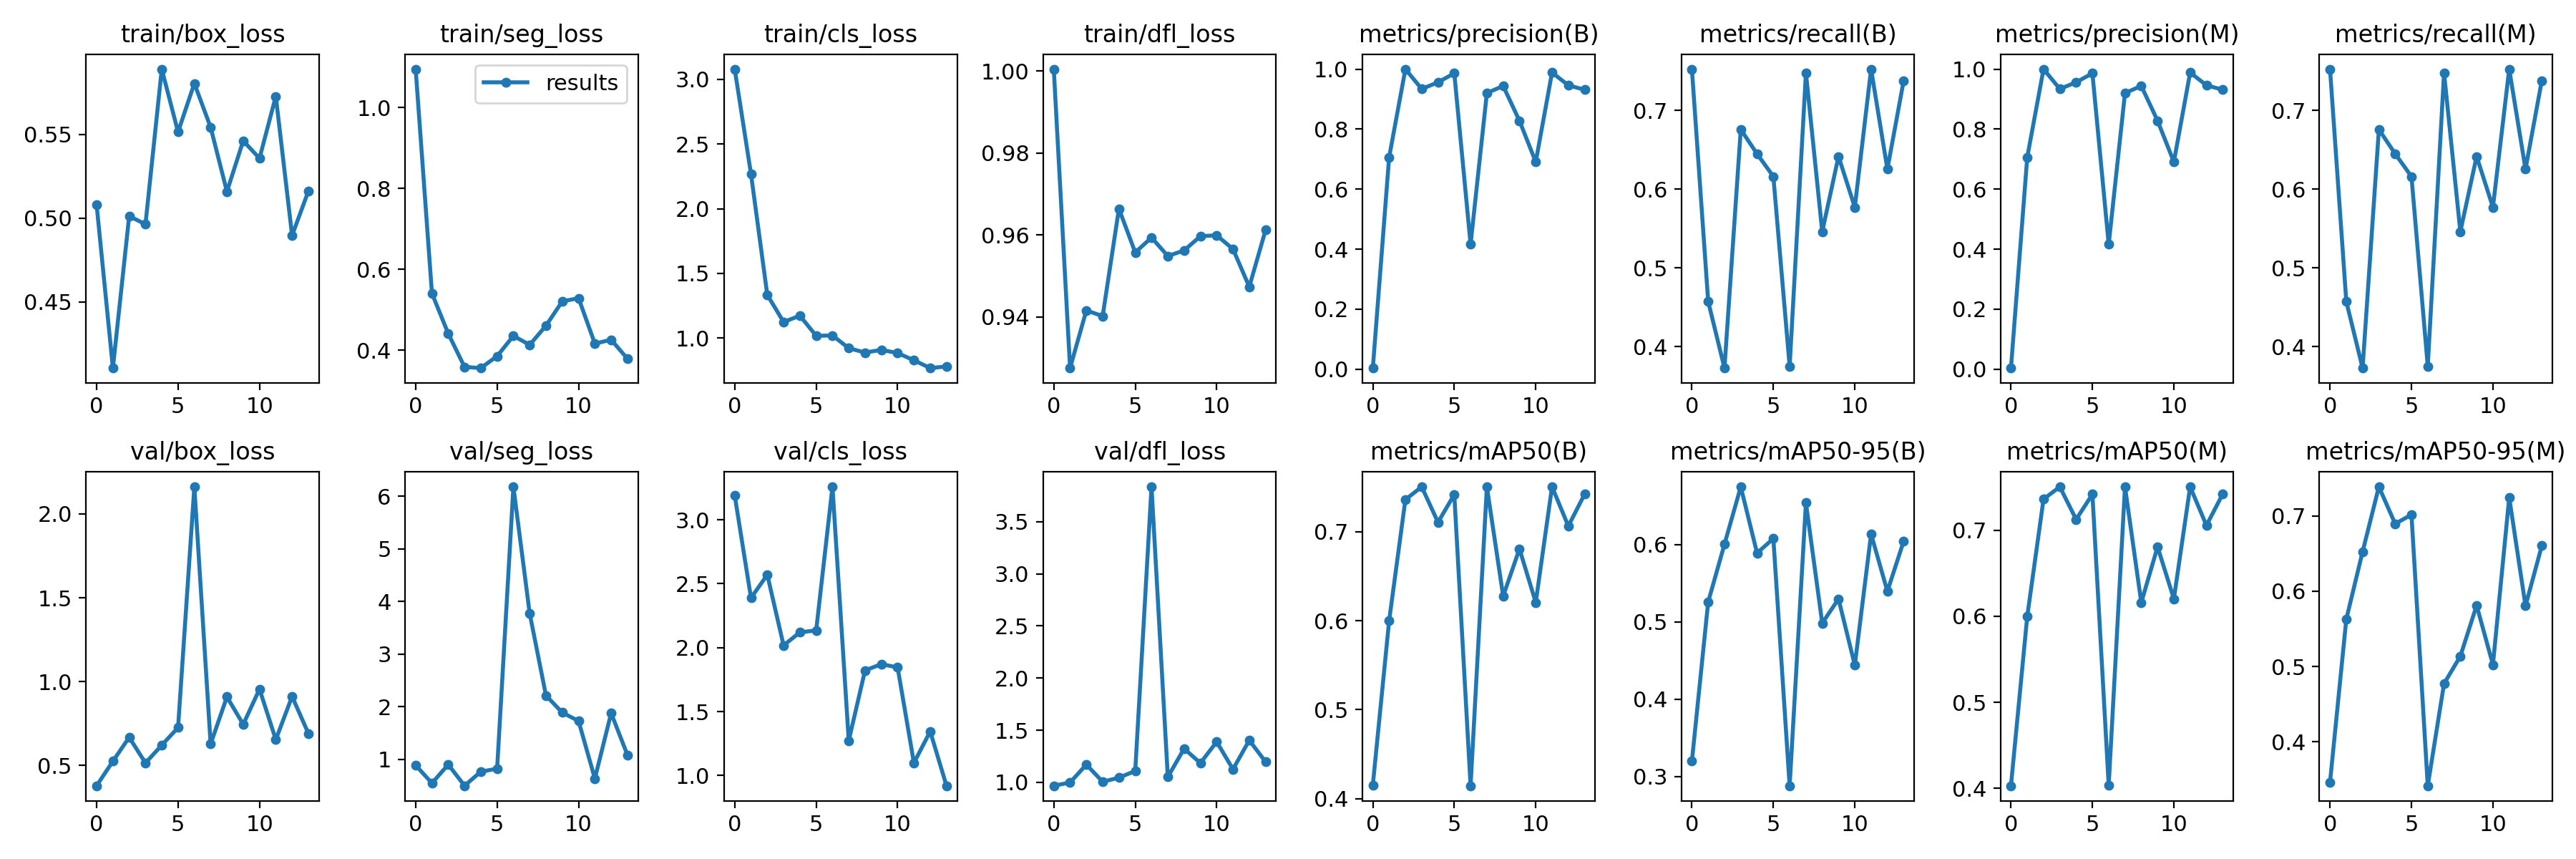

In [12]:
from IPython.display import Image
display(Image(filename='/content/runs/segment/train/results.png'))

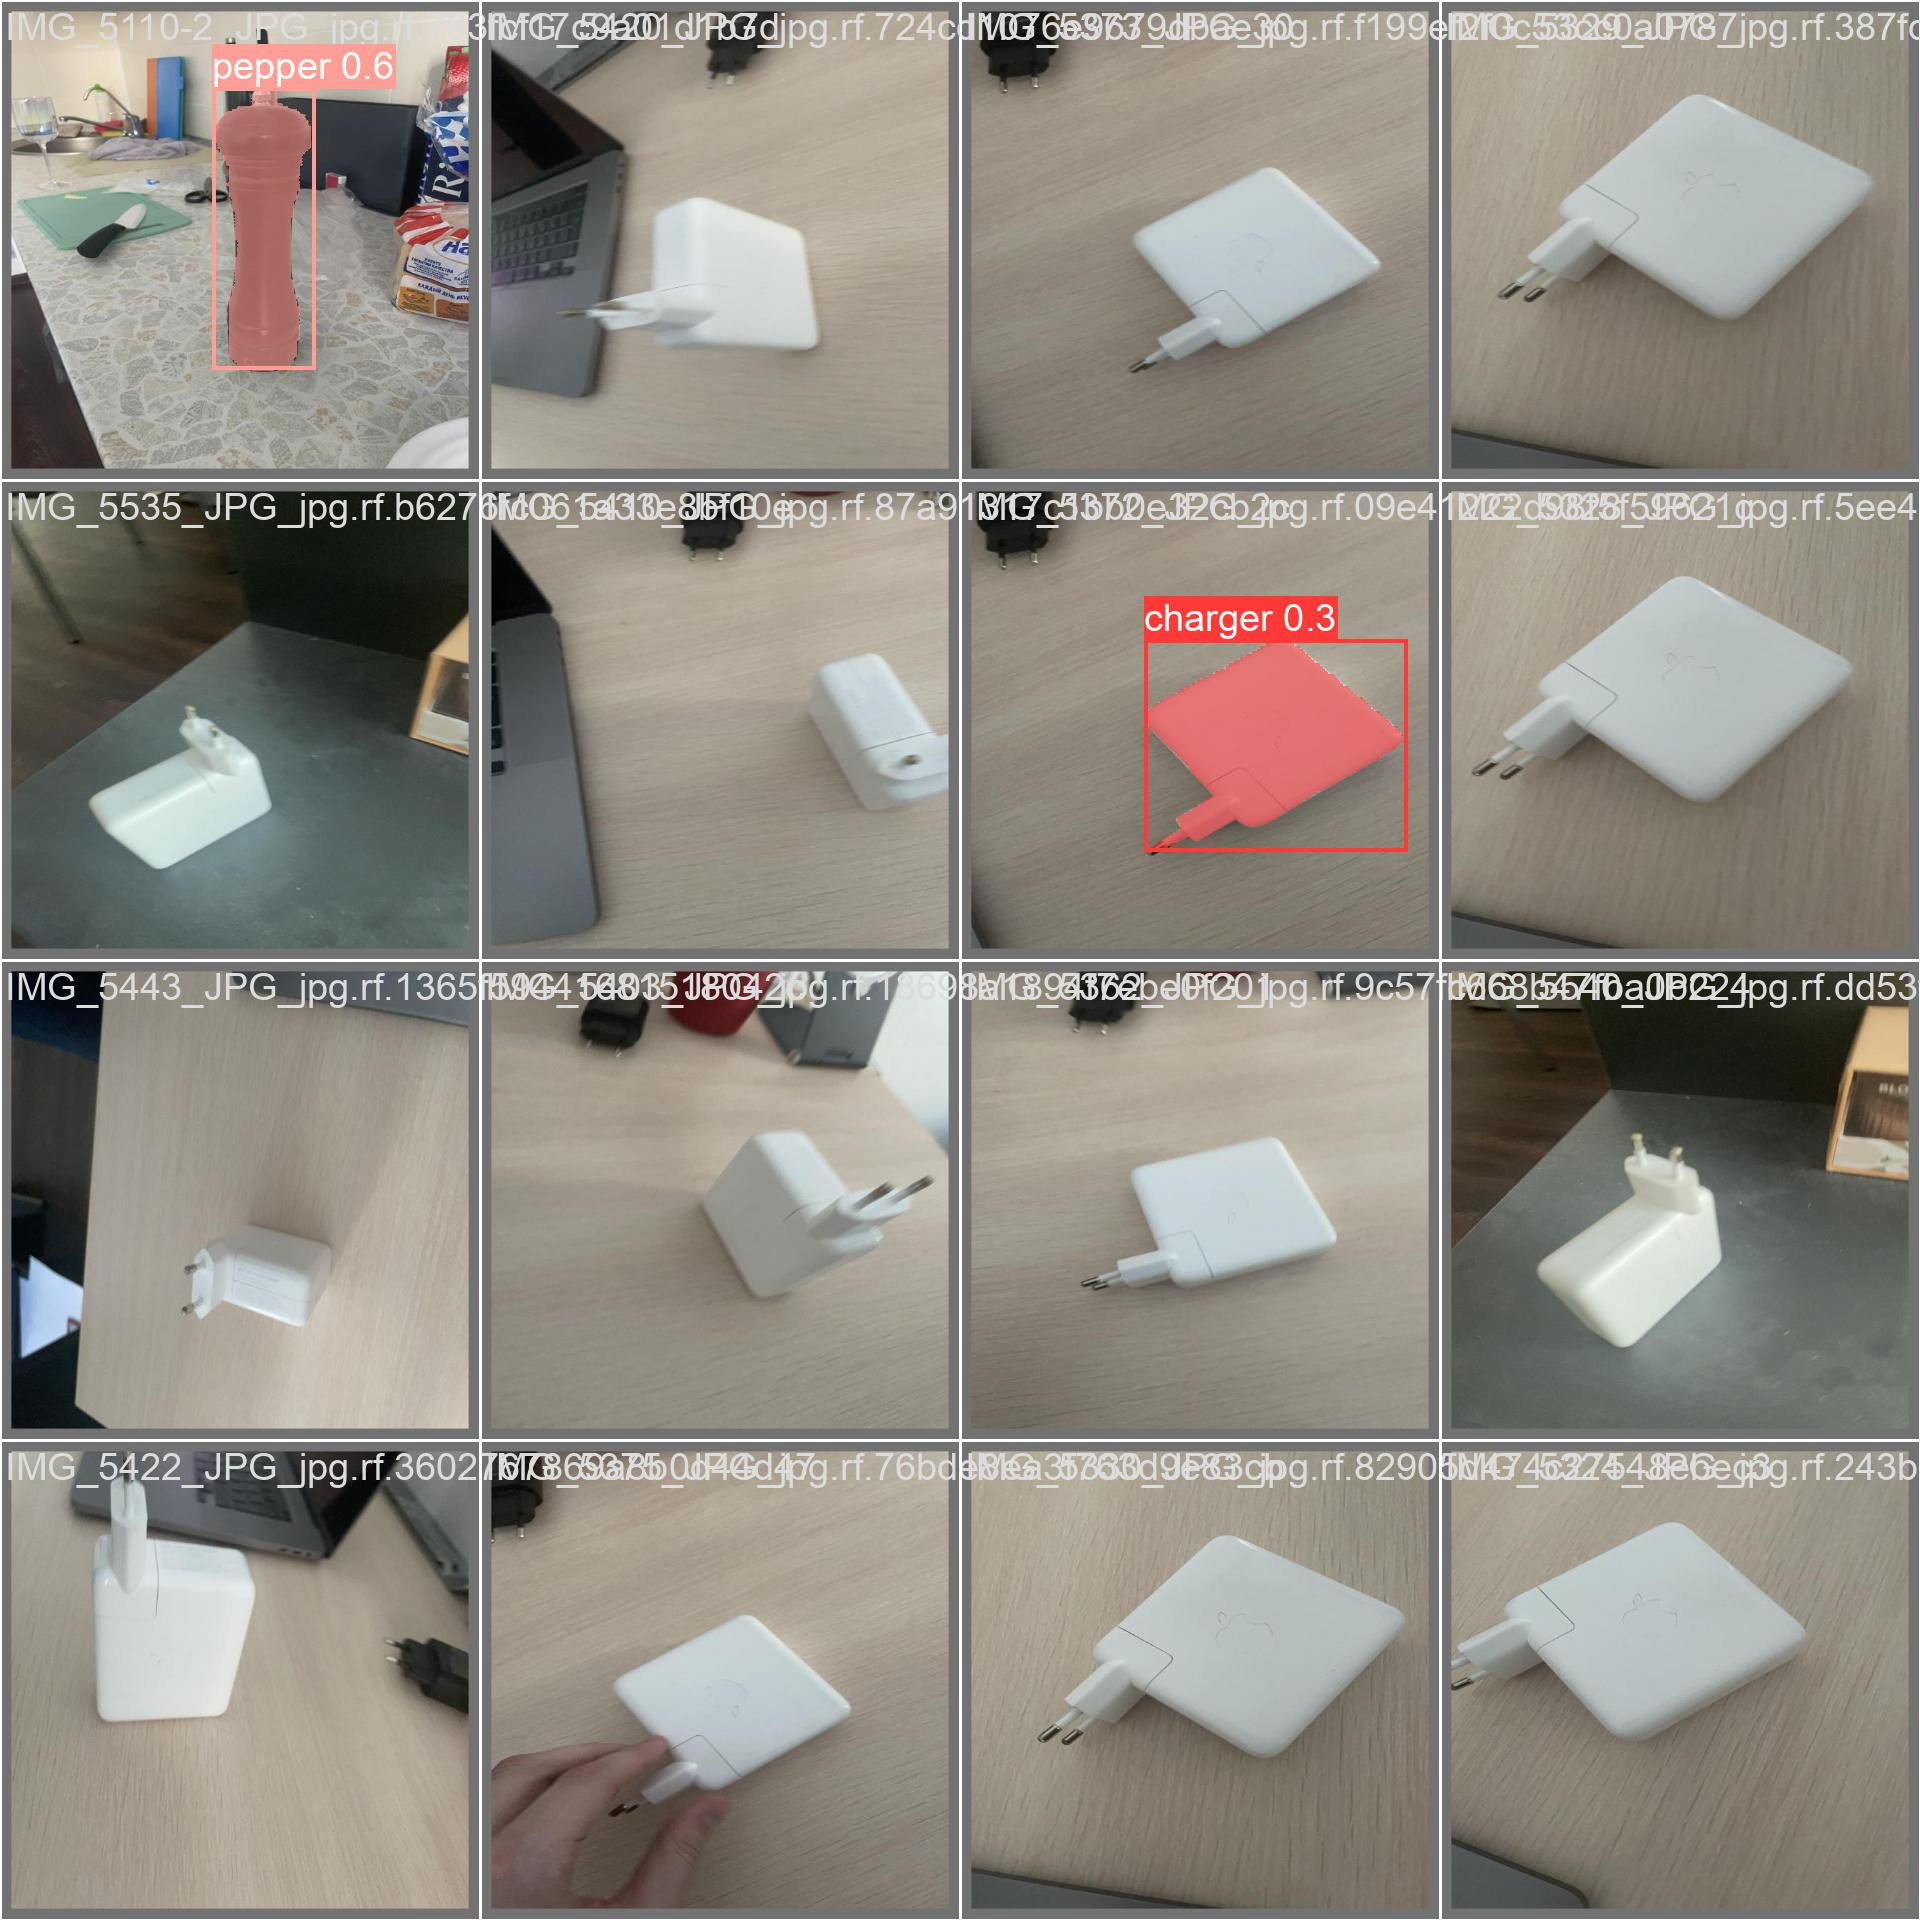

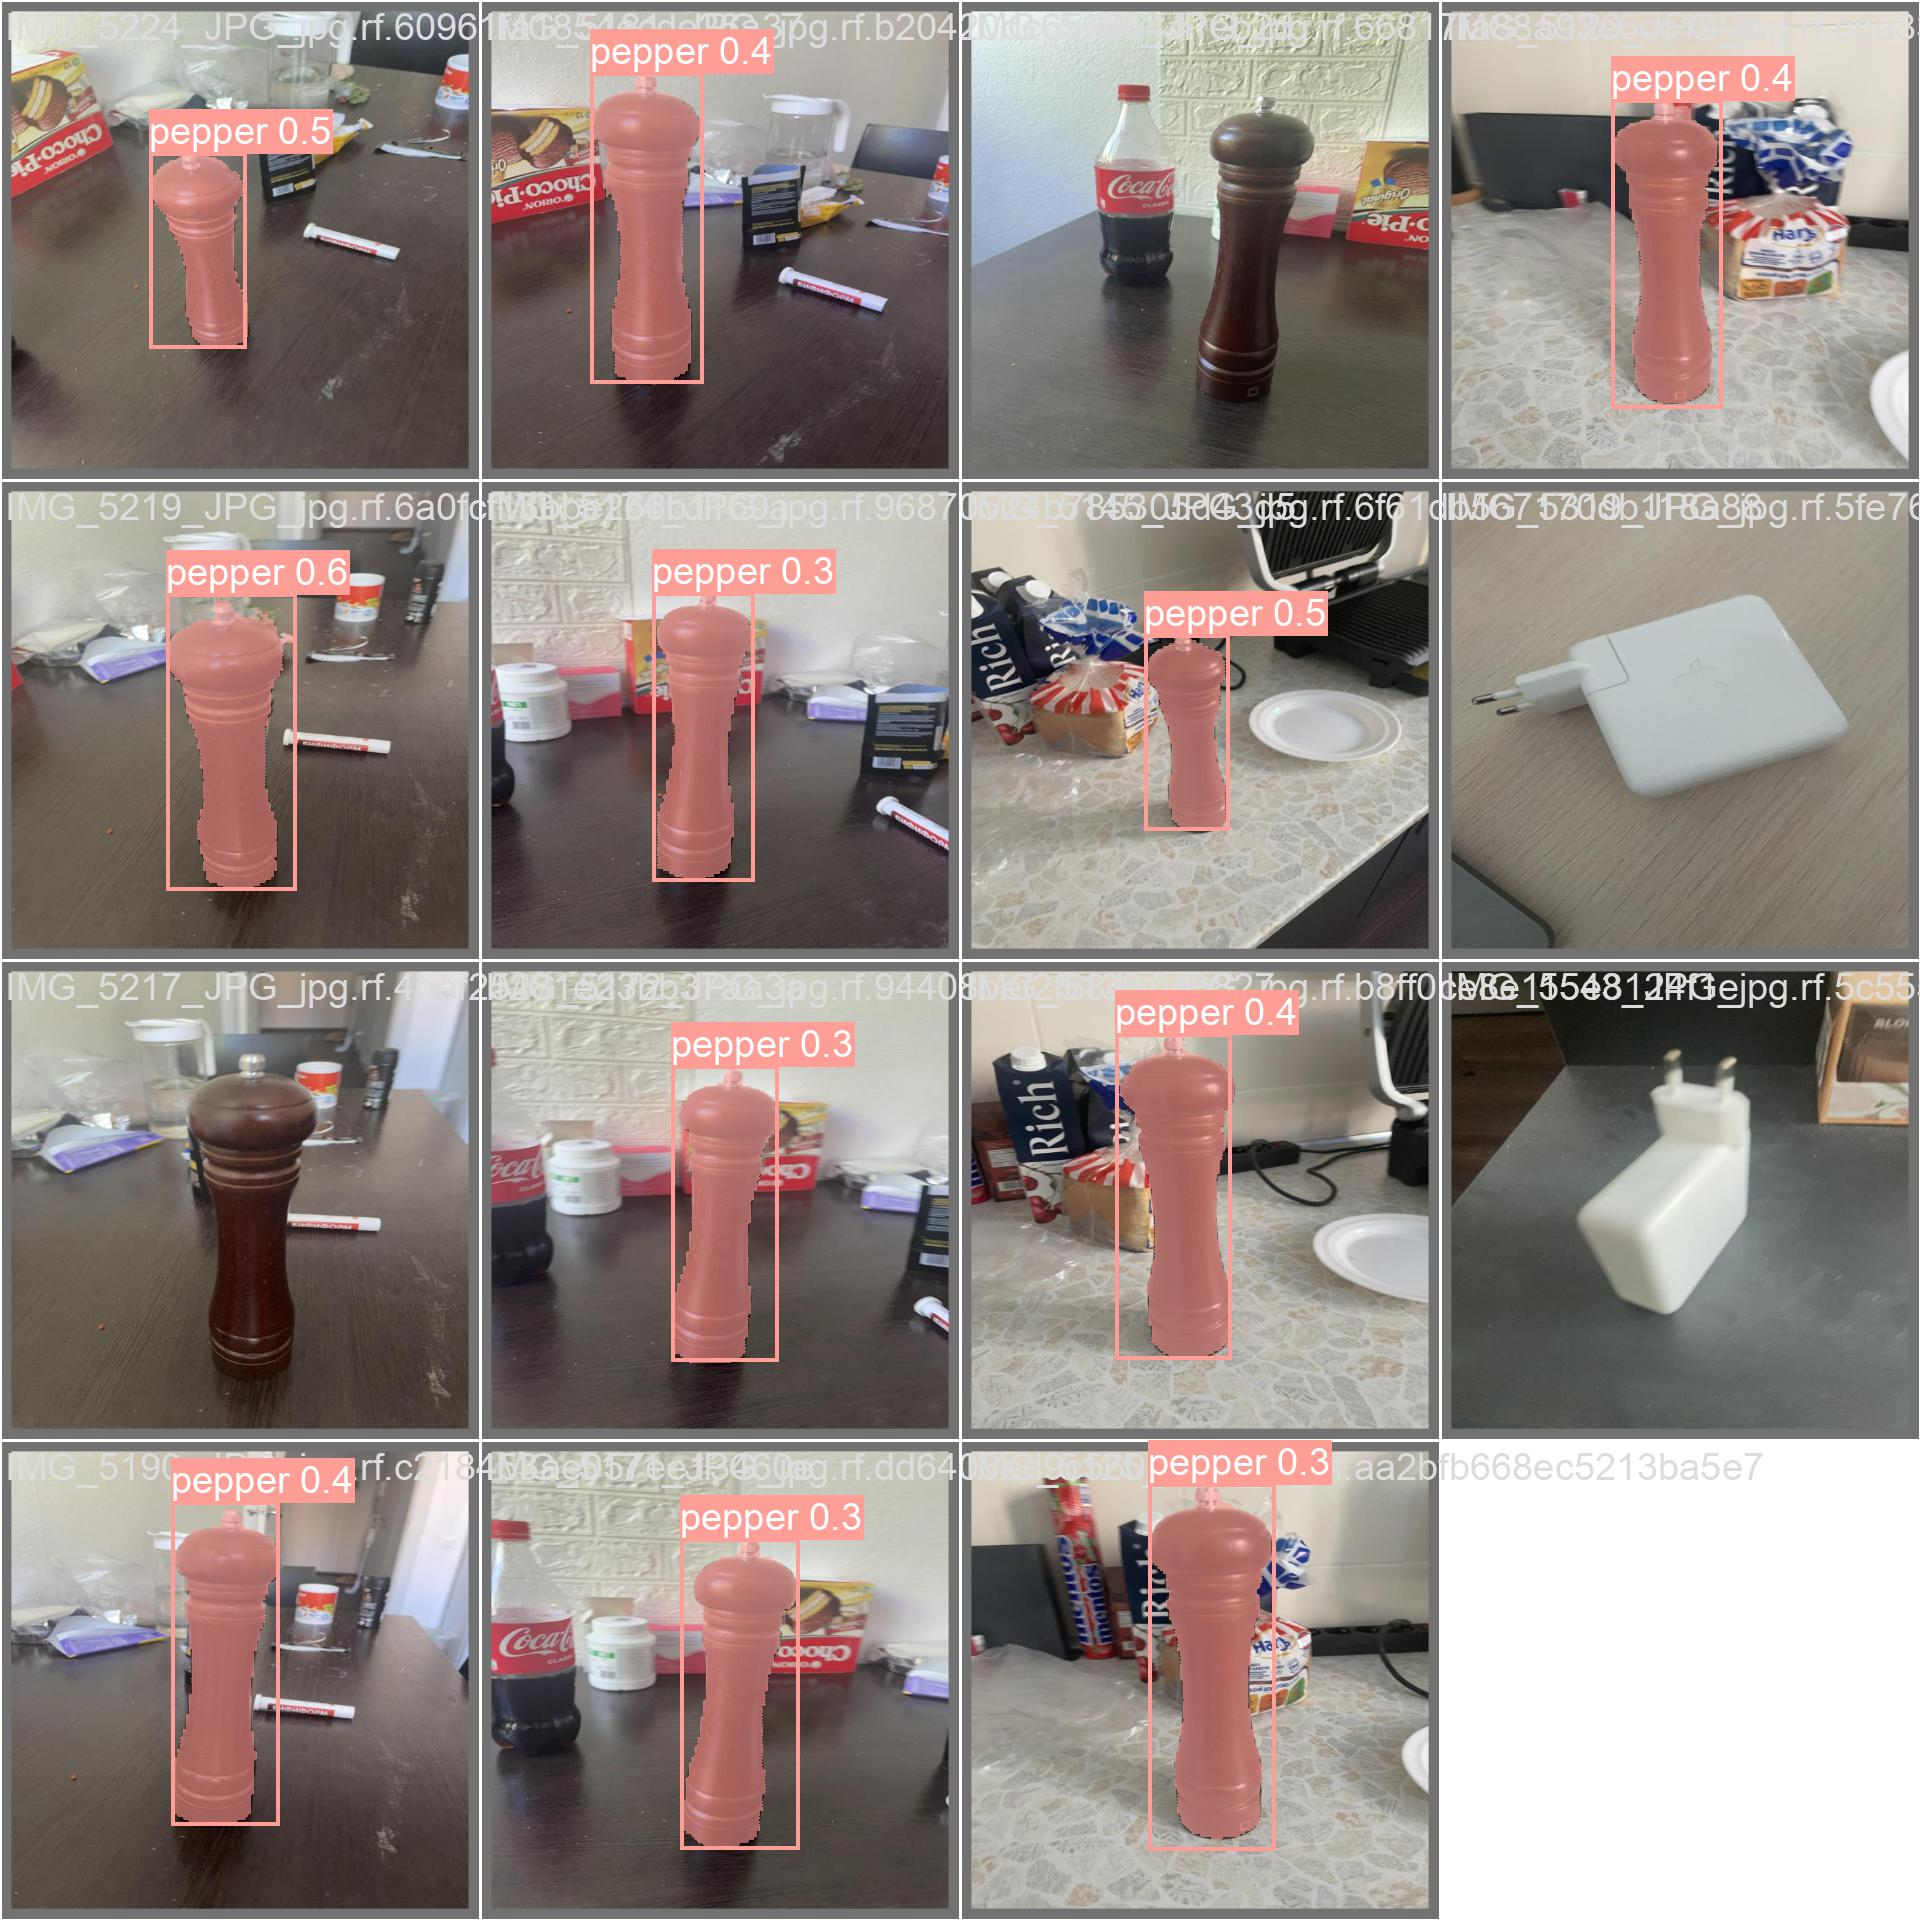

In [15]:
display(Image(filename='/content/runs/segment/val/val_batch0_pred.jpg'))
display(Image(filename='/content/runs/segment/val/val_batch1_pred.jpg'))

### Second model

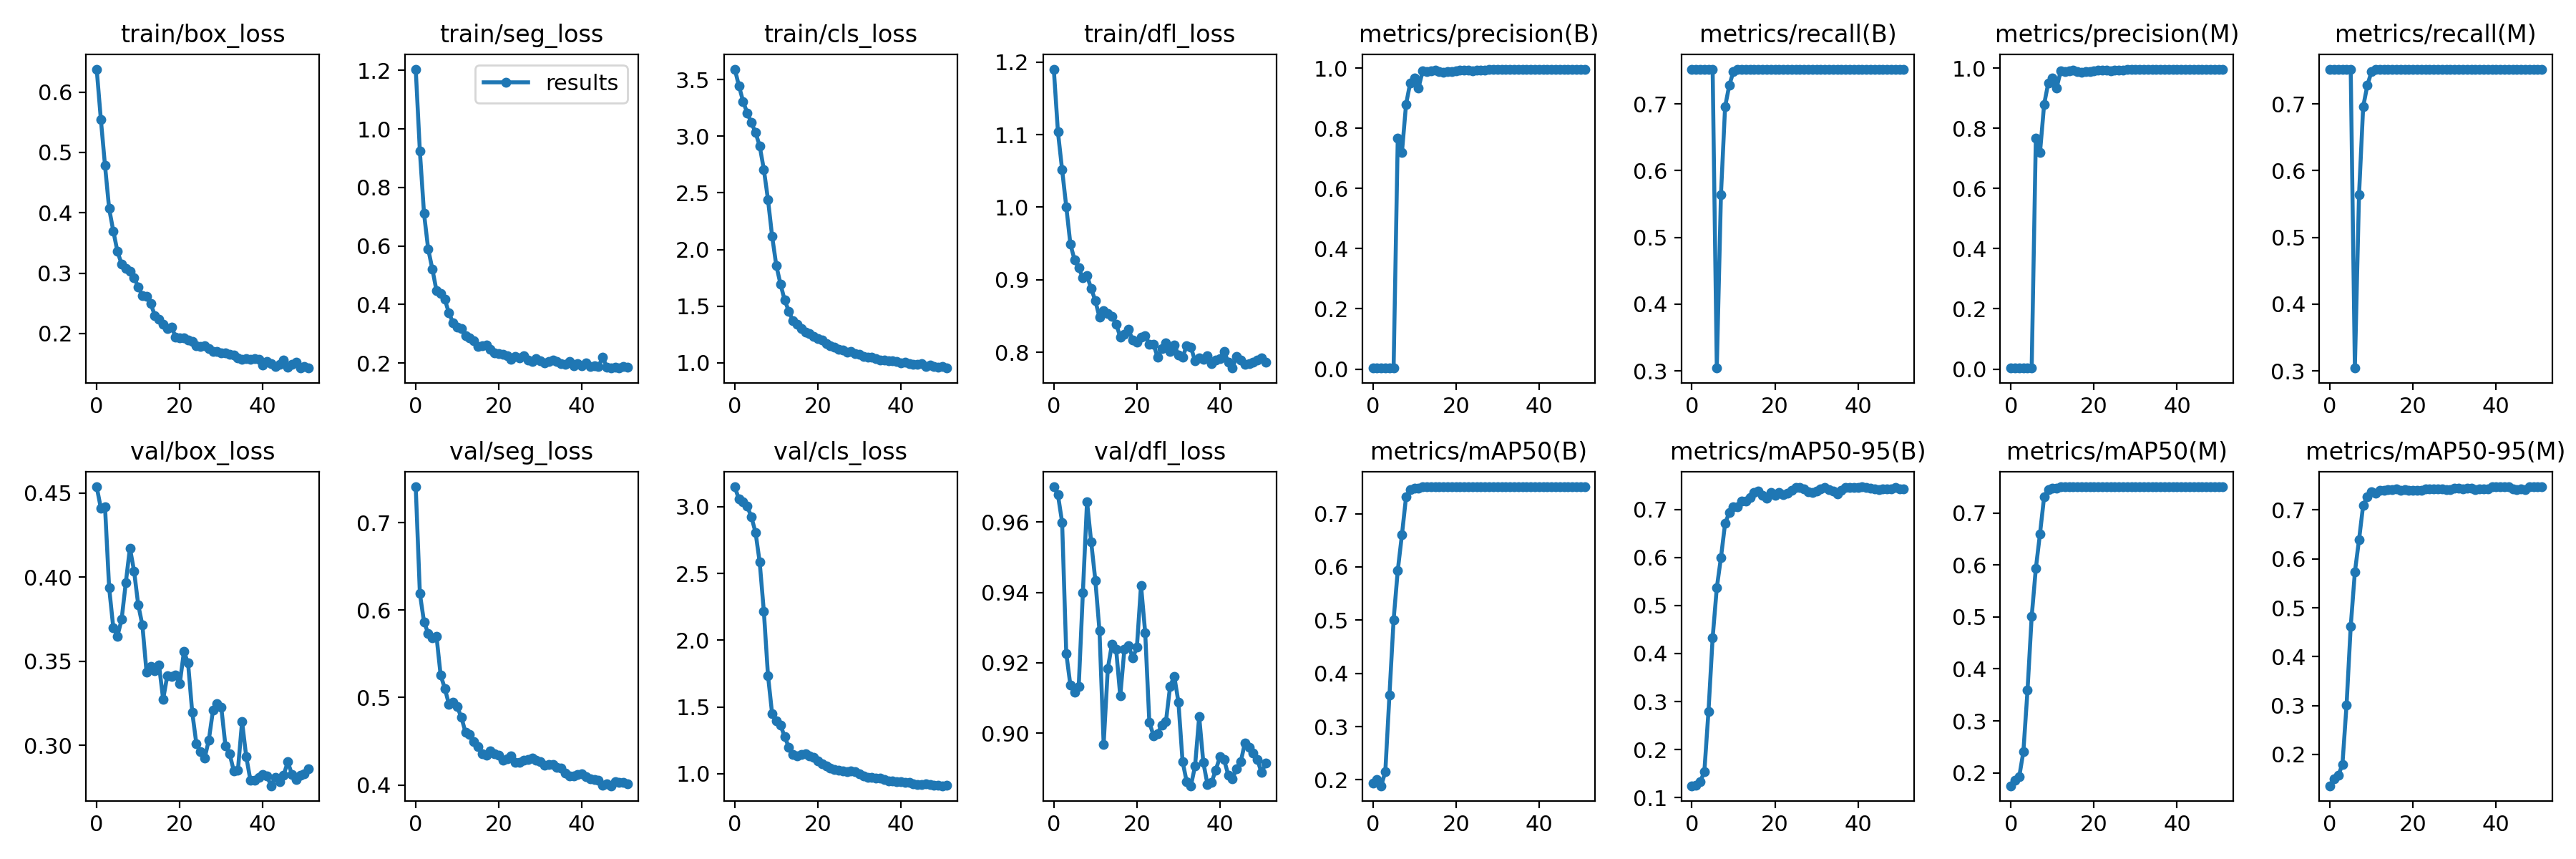

In [13]:
display(Image(filename='/content/runs/segment/train2/results.png'))

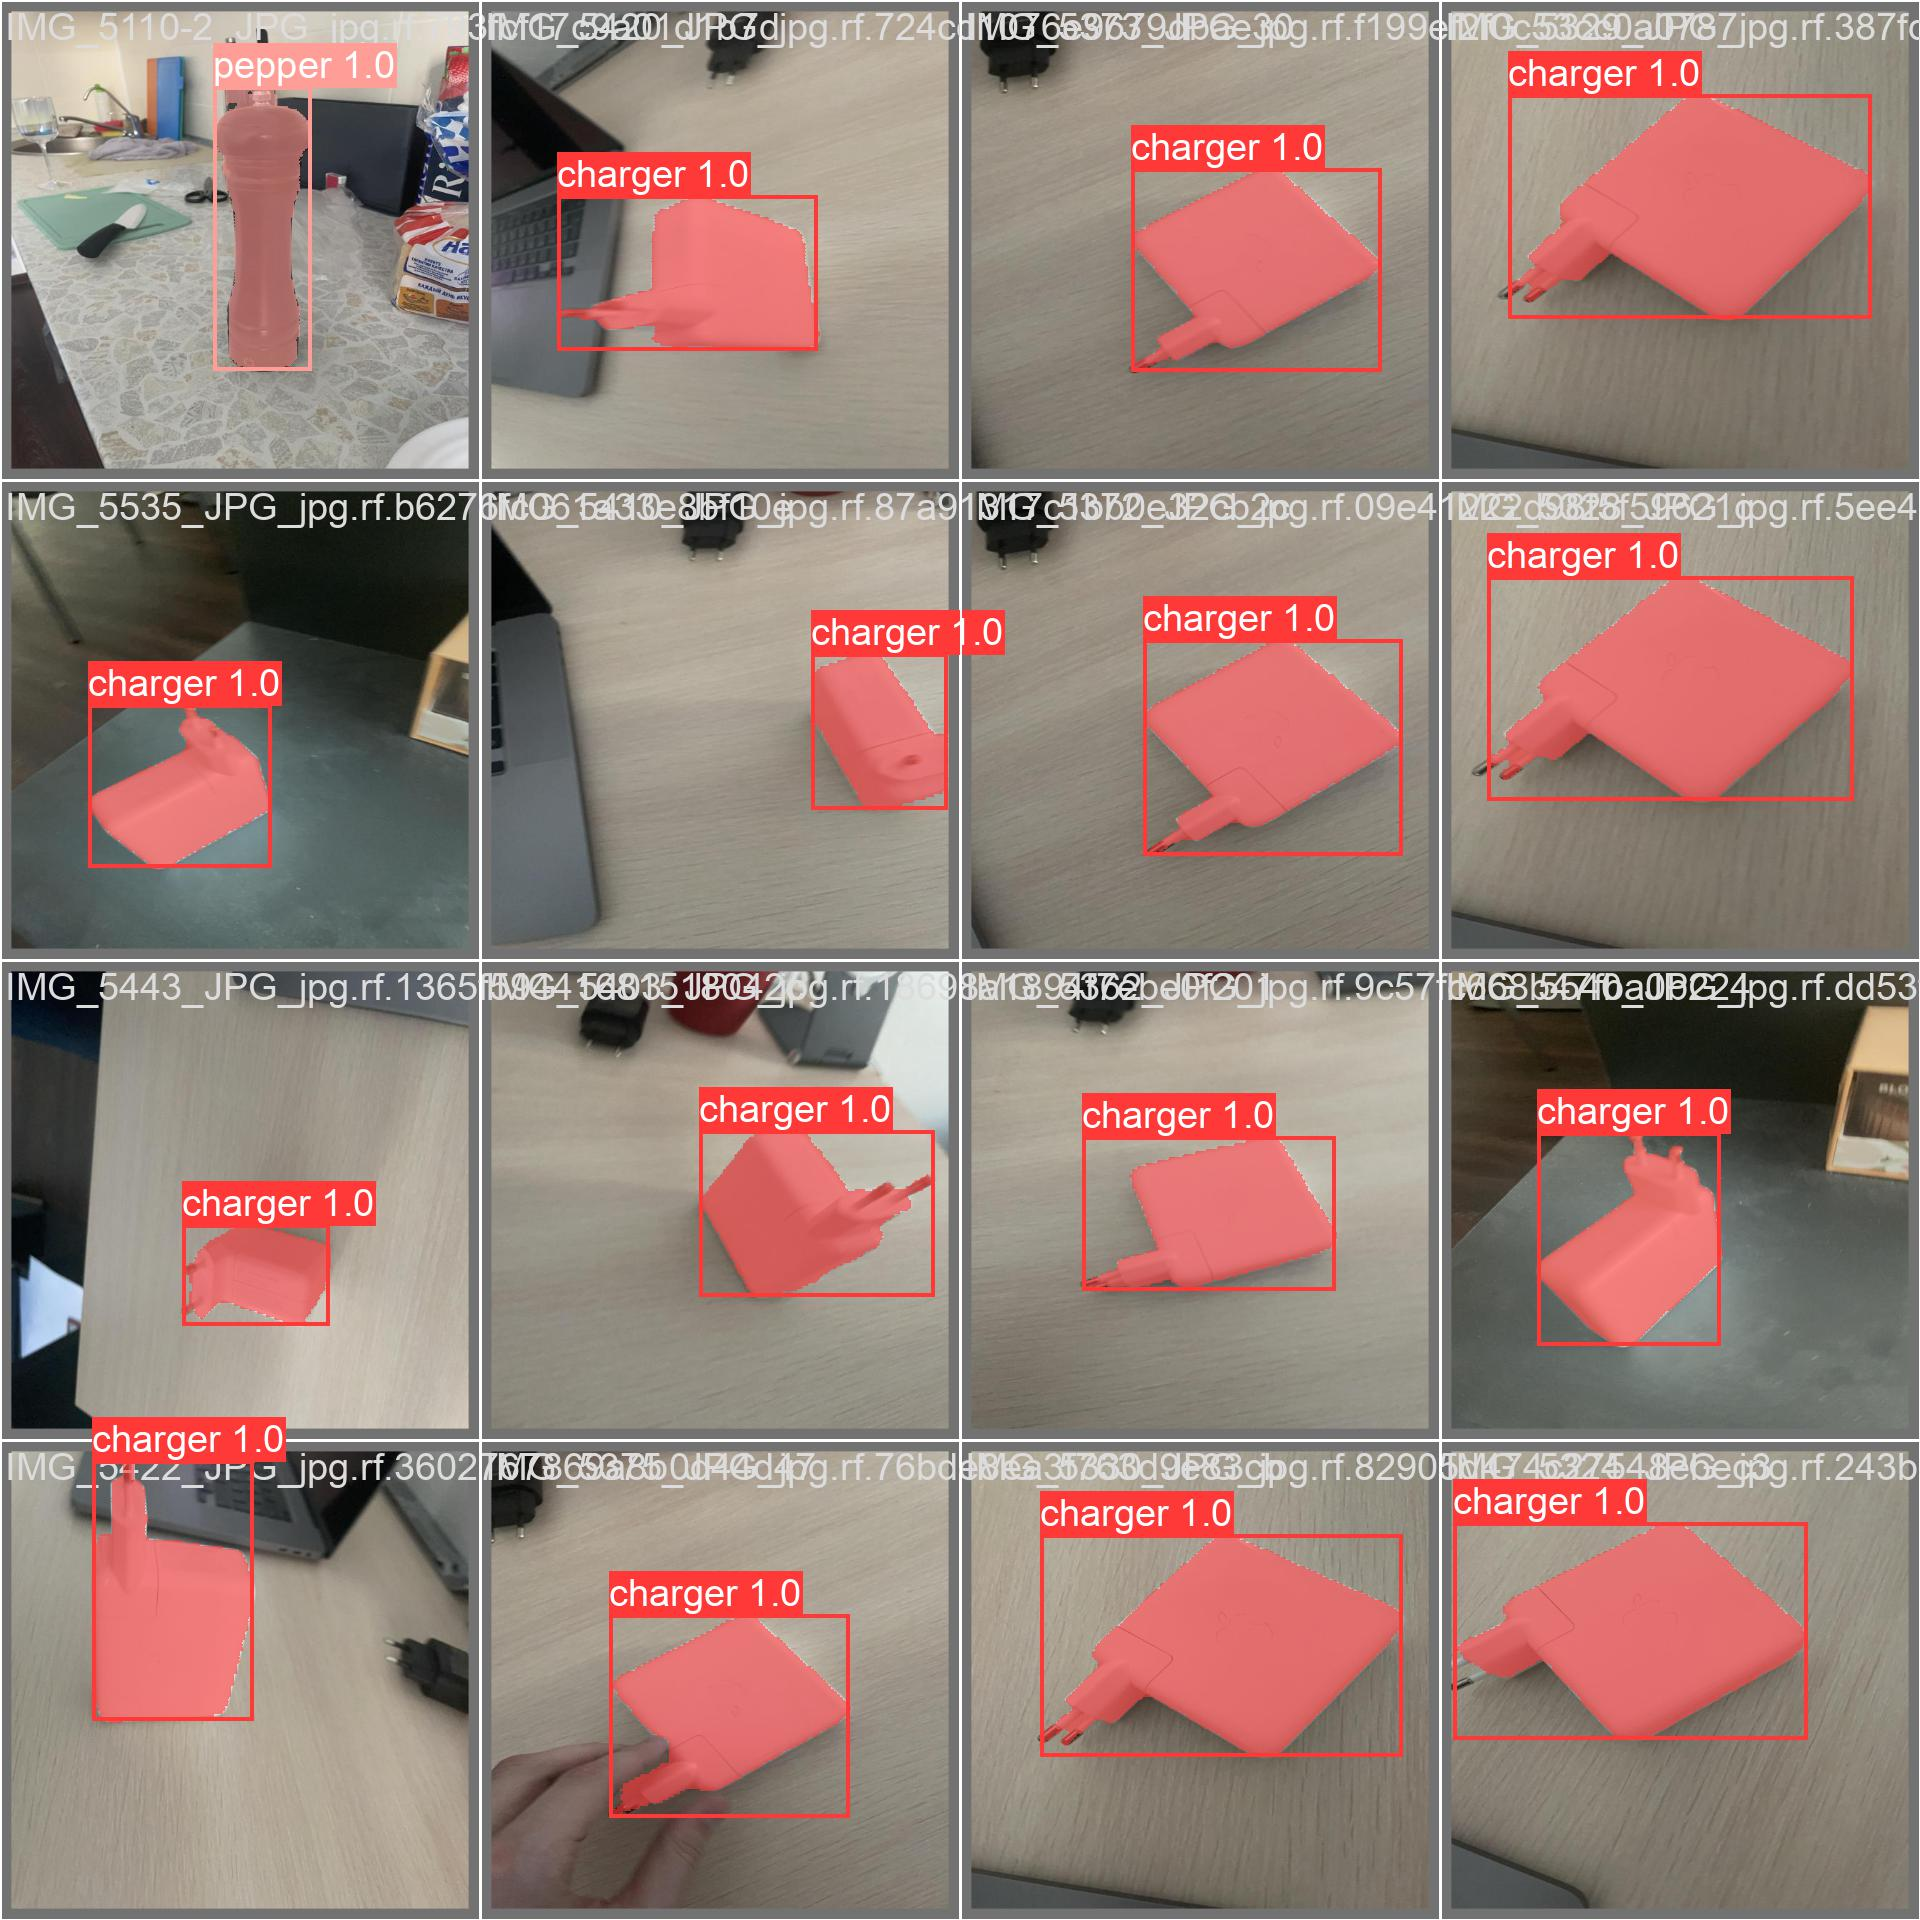

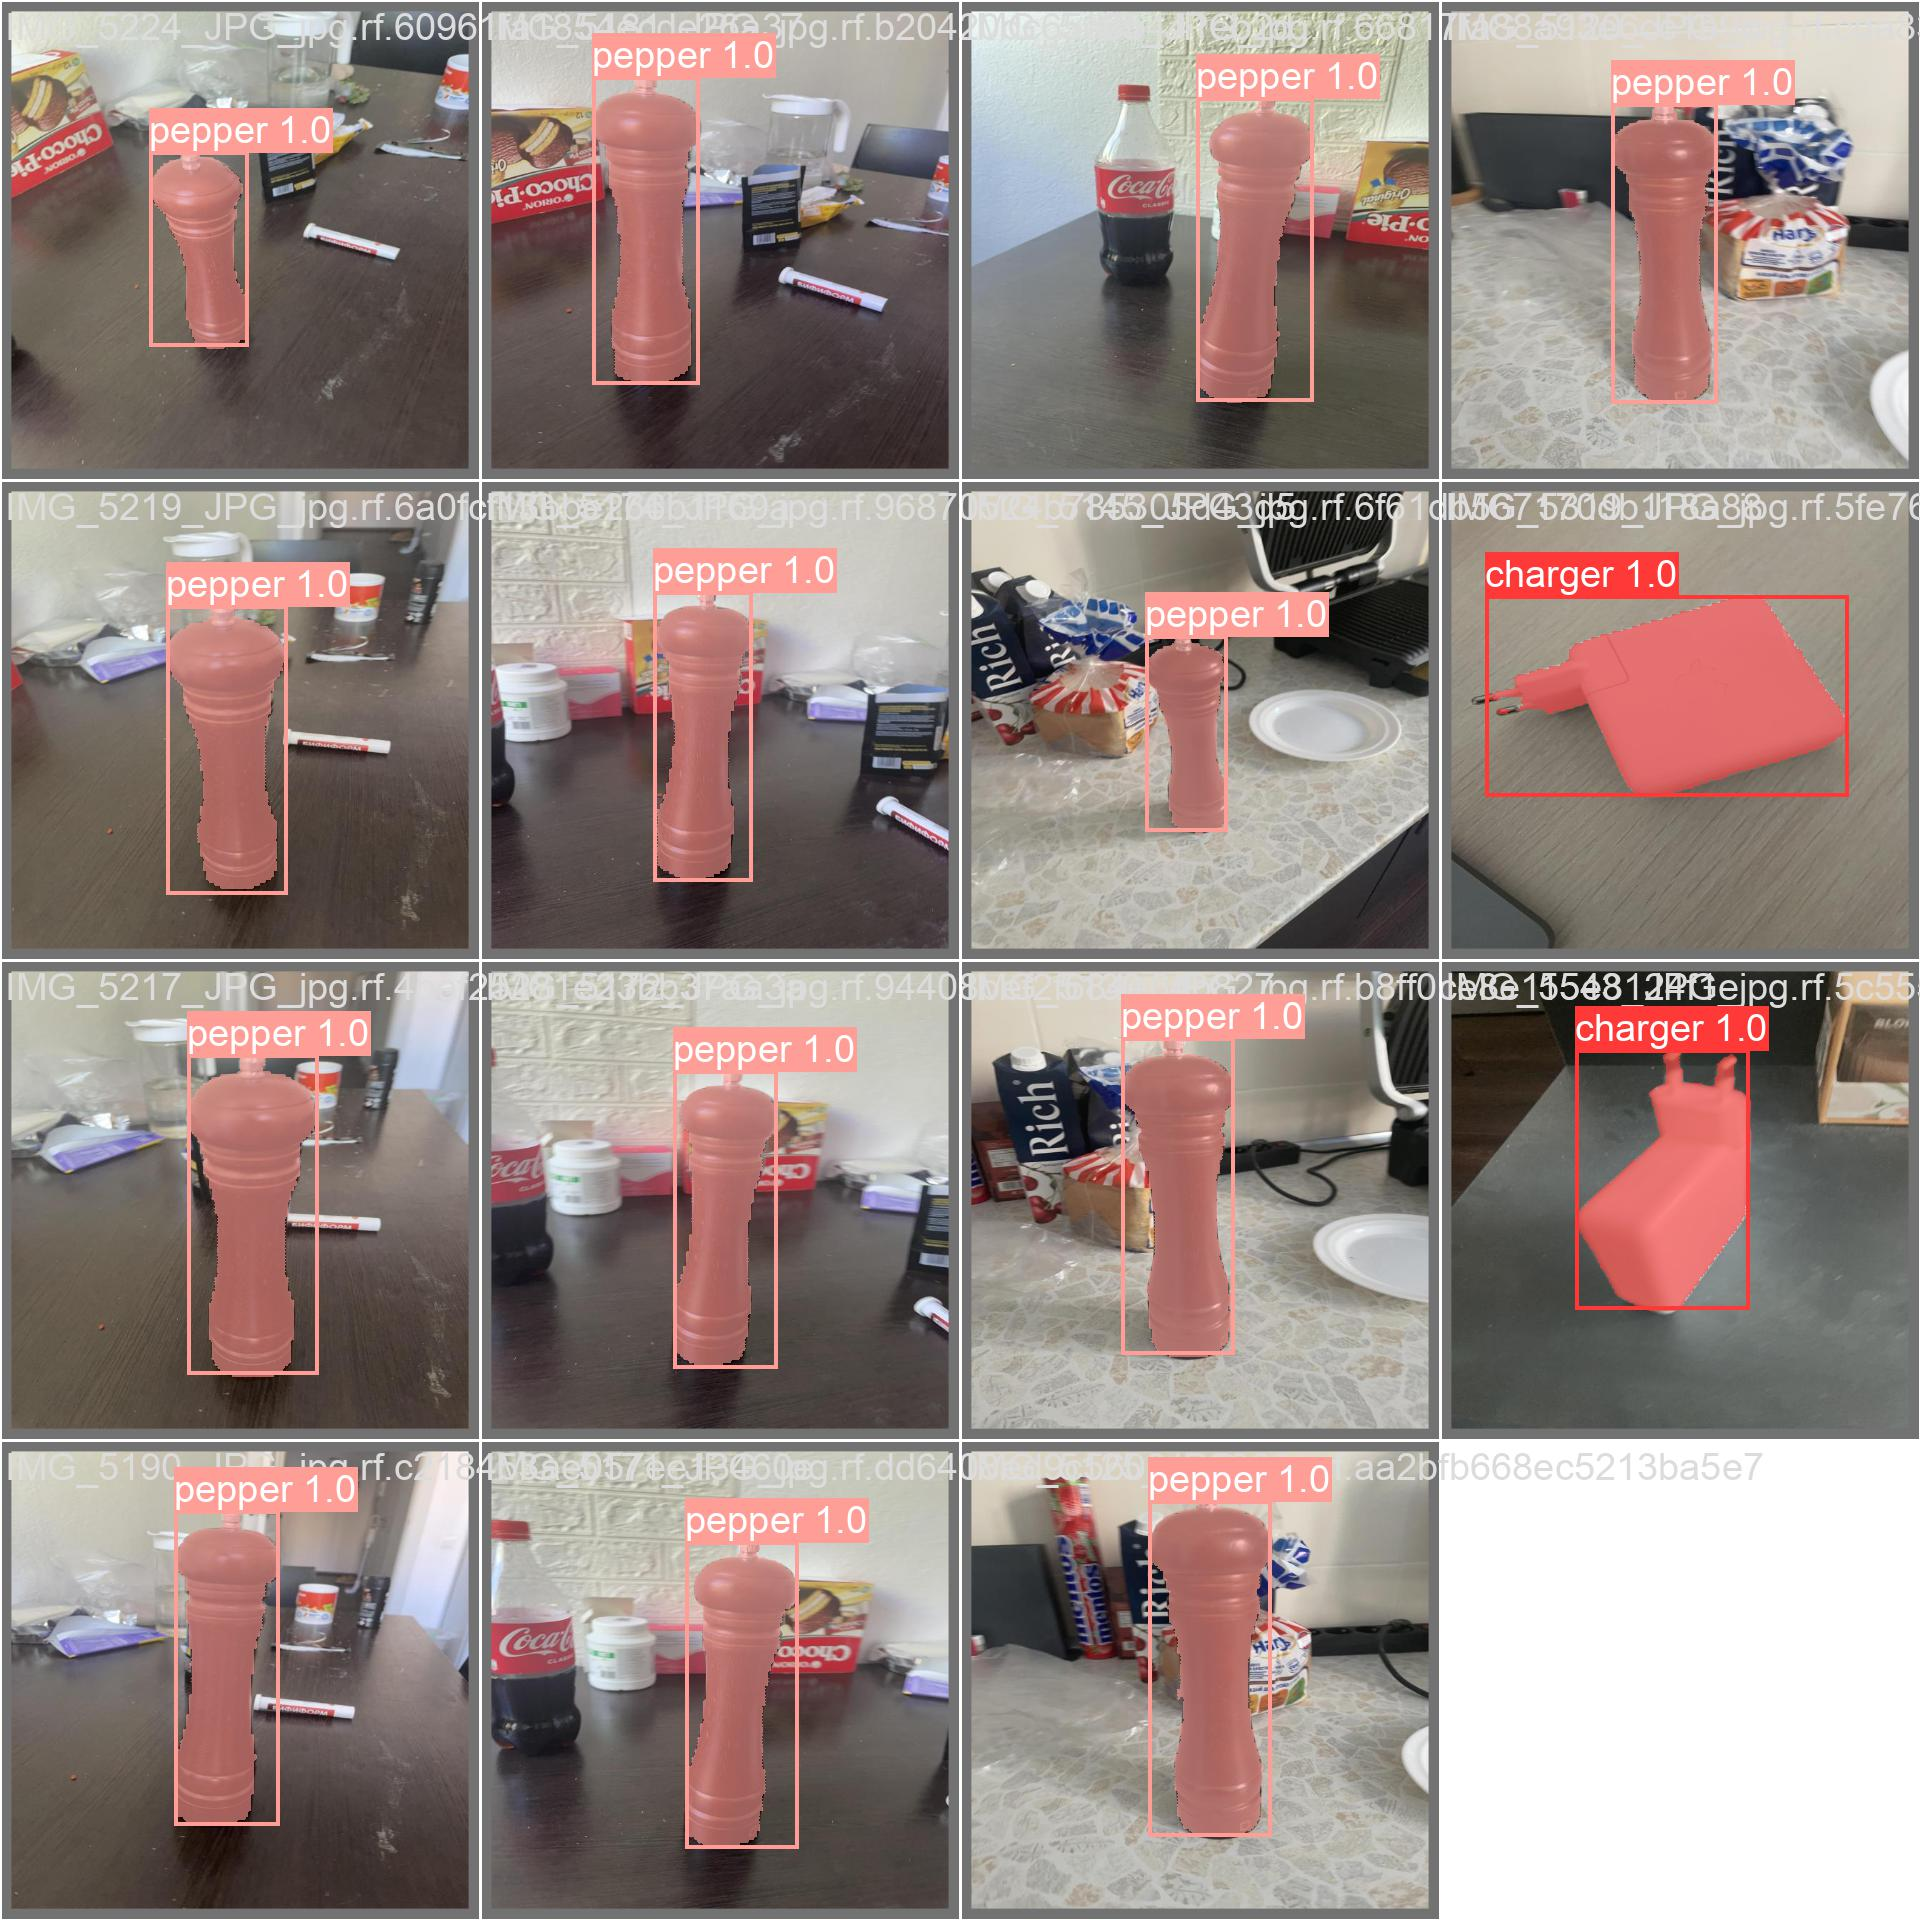

In [16]:
display(Image(filename='/content/runs/segment/val3/val_batch0_pred.jpg'))
display(Image(filename='/content/runs/segment/val3/val_batch1_pred.jpg'))

In [11]:
model.val(split='test')

Ultralytics YOLOv8.0.92 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/amlseg-1/test/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]
                   all         15         21      0.991      0.718      0.715      0.692      0.991      0.718      0.715      0.706
               charger         15         11      0.989      0.636      0.636      0.625      0.989      0.636      0.636      0.636
                pepper         15         10      0.993        0.8      0.795      0.758      0.993        0.8      0.795      0.777
Speed: 0.3ms preprocess, 8.3ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/segment/val4


ultralytics.yolo.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f2300b3f580>
fitness: 1.4010946067248653
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)']
maps: array([     1.2608,      1.5348])
names: {0: 'charger', 1: 'pepper'}
plot: True
results_dict: {'metrics/precision(B)': 0.9910189848116875, 'metrics/recall(B)': 0.7181818181818183, 'metrics/mAP50(B)': 0.7154669567225488, 'metrics/mAP50-95(B)': 0.6916500630369088, 'metrics/precision(M)': 0.9910189848116875, 'metrics/recall(M)': 0.7181818181818183, 'metrics/mAP50(M)': 0.7154669567225488, 'metrics/mAP50-95(M)': 0.7061290651634861, 'fitness': 1.4010946067248653}
save_dir: PosixPath('runs/segment/val4')
seg: ultralytics.yolo.utils.metrics.M

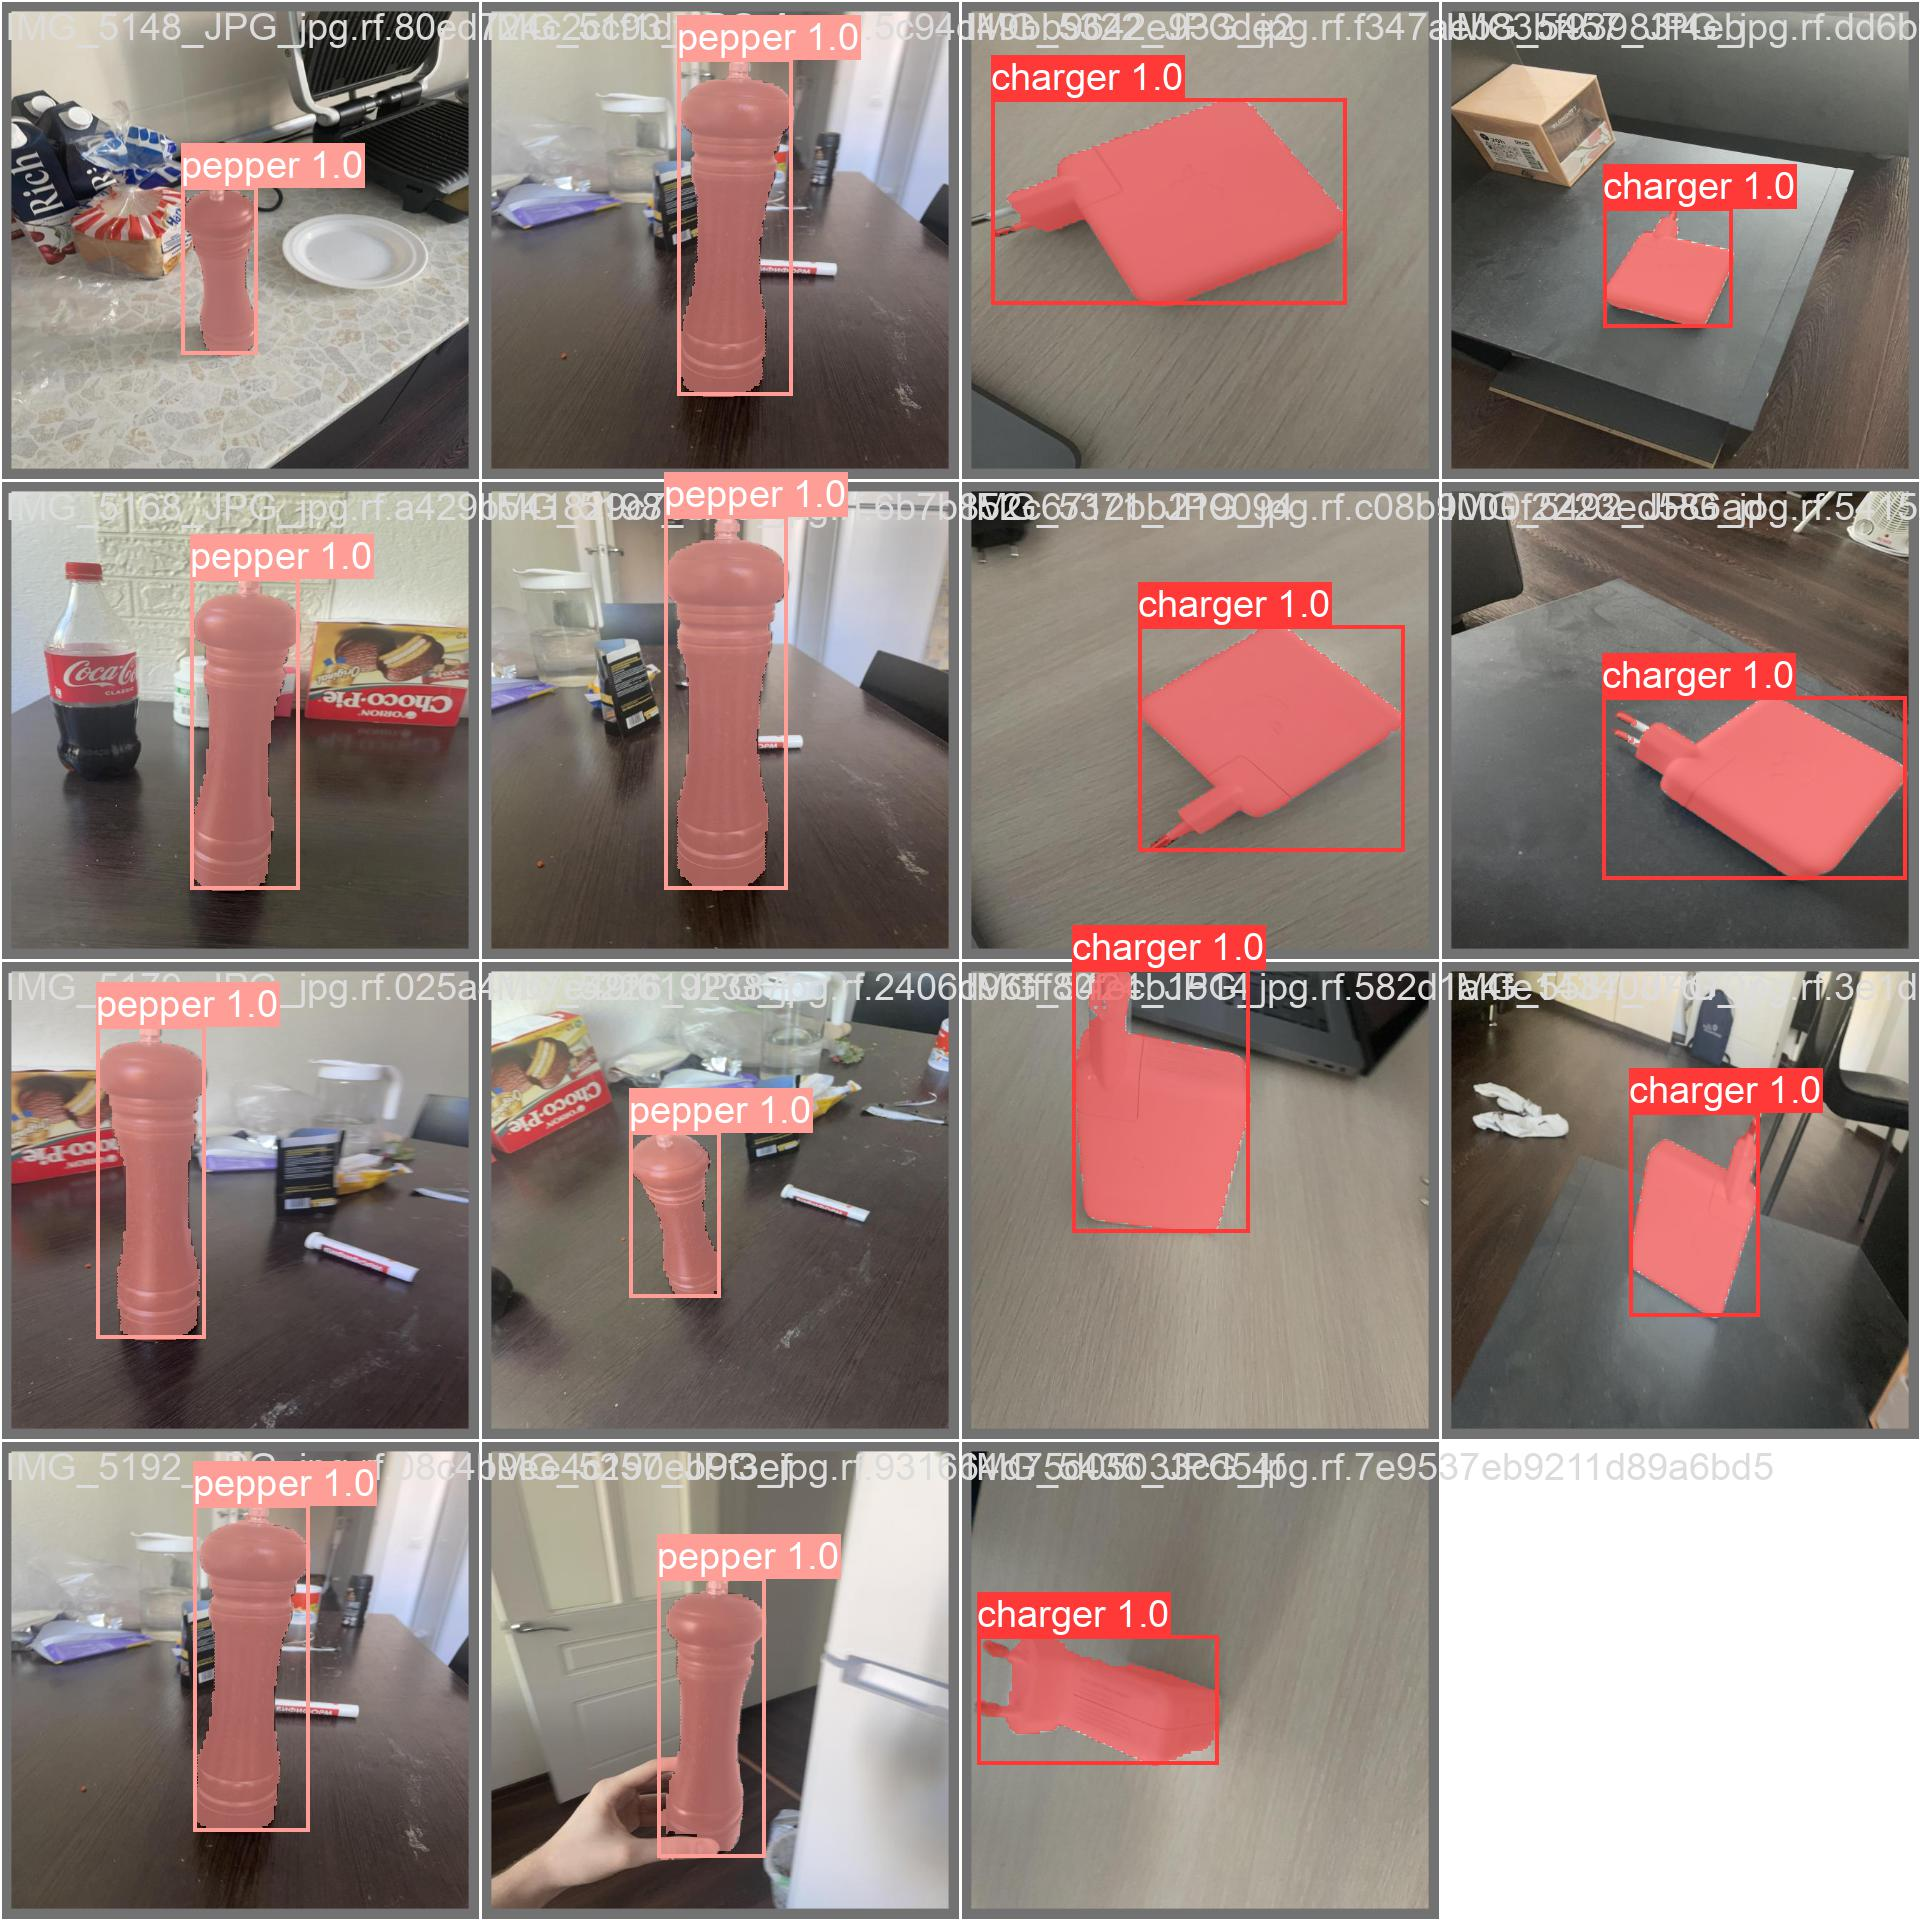

In [17]:
display(Image(filename='/content/runs/segment/val4/val_batch0_pred.jpg'))